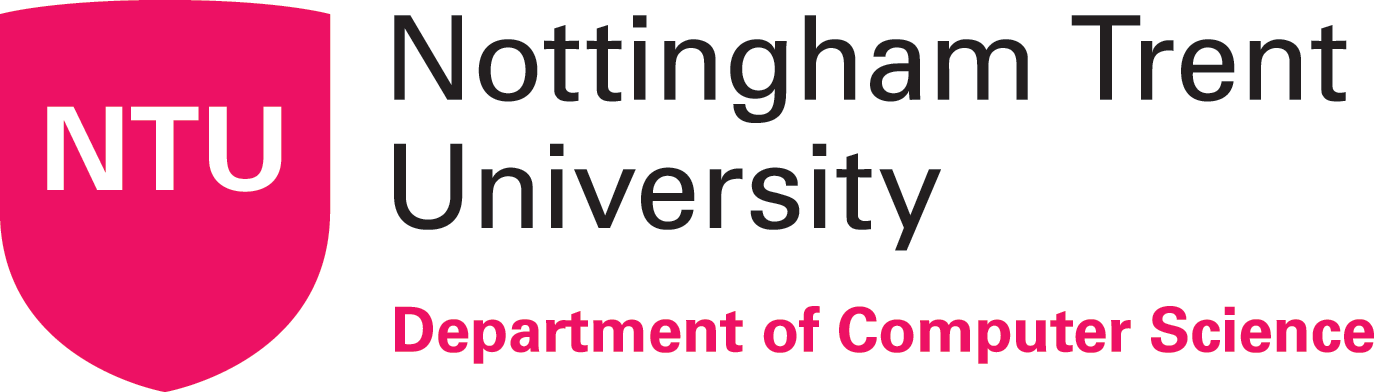

# SOFT40161 - Introduction to Computer Programming
# Submission of the Coursework

## Name: Ruth Amey
## NTU ID: N1019812 

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

At least 3-4 things for each part showing skills basically

dataset = https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric?select=METABRIC_RNA_Mutation.csv

# 

Github Link: <a href="https://github.com/Ruthamey1/CP_COURSEWORK">(Click here)</a>

# Section 1: Control Structures (16 marks)


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

In [213]:
# Explanation and Documentation 

This is a binar classification problem where i will be investigating whether the patient survives (1) or not (0).

In [218]:
#Import data from kaggle

path = kagglehub.dataset_download("raghadalharbi/breast-cancer-gene-expression-profiles-metabric")

print("Path to dataset files:", path)

Path to dataset files: /Users/ruthamey/.cache/kagglehub/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/versions/1


In [219]:
#Reading csv file
data = pd.read_csv(f'{path}/METABRIC_RNA_Mutation.csv')
data.head()

/var/folders/fy/p_zfmrqj0yn93nq3xwgxytjw0000gn/T/ipykernel_11891/4176210724.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'{path}/METABRIC_RNA_Mutation.csv')


patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 claudin-low     1.0                   Positve  ...        0   
1                        LumA     1.0                   Positve  ...        0   
2                        LumB     1.0                   Positve  ...        0   
3                        LumB     1.0                   Positve  ...        0   
4                        LumB     1.0                   Positve  ...        0   

   ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut smarcb1_mut  \
0           0           0        0          0         0         0           0   
1           0           0        0          0         0         0           0   
2           0           0        0          0         0         0           0   
3           0           0        0          0         0         0           0   
4           0           0        0          0         0         0           0   

  stmn2_mut  siah1_mut  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  

[5 rows x 693 columns]

In [220]:
print(data.shape)

(1904, 693)


The shape of the data shows there are 1904 entries with 693 features, these features are a mix of clinical attributes which are the first 31 columns and genetic attributes being the other 662 columns I am only going to focus on the clinical attributes so first i will remove the genetic columns

In [221]:
clinical_attributes = data.iloc[:, 0:31]
clinical_attributes.head()

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  nottingham_prognostic_index  oncotree_code overall_survival_months  \
0                       6.044            IDC              140.500000   
1                       4.020            IDC               84.633333   
2                       4.030            IDC              163.700000   
3                       4.050           MDLC              164.933333   
4                       6.080           MDLC               41.366667   

  overall_survival pr_status  radio_therapy 3-gene_classifier_subtype  \
0                1  Negative              1                 ER-/HER2-   
1                1  Positive              1     ER+/HER2- High Prolif   
2                0  Positive              0                       NaN   
3                1  Positive              1                       NaN   
4                0  Positive              1     ER+/HER2- High Prolif   

  tumor_size tumor_stage  death_from_cancer  
0       22.0         2.0             Living  
1       10.0         1.0             Living  
2       15.0         2.0    Died of Disease  
3       25.0         2.0             Living  
4       40.0         2.0    Died of Disease  

[5 rows x 31 columns]

This is still a lot of features to analyse so am reducing to the features I deem most important

In [222]:
clinical_attributes['cancer_type'].value_counts()

cancer_type
Breast Cancer     1903
Breast Sarcoma       1
Name: count, dtype: int64

In [223]:
for row in range(len(clinical_attributes)):
    if clinical_attributes.loc[row, 'cancer_type']=='Breast Sarcoma':
        print(row)

170


This is a feature I would of deemed important but as there is only one value for breast sarcoma I have decided to remove the value as there is not enough data to give us any information on breast sarcomas which is of value.

In [224]:
clinical_attributes = clinical_attributes.drop(170)

In [225]:
features_to_keep = ['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
                    'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'overall_survival_months', 'overall_survival',
                    'tumor_size', 'tumor_stage']
data = pd.DataFrame()

for feature in features_to_keep:
    data[feature] = clinical_attributes.loc[:, feature]

data.head()

age_at_diagnosis type_of_breast_surgery  \
0             75.65             MASTECTOMY   
1             43.19      BREAST CONSERVING   
2             48.87             MASTECTOMY   
3             47.68             MASTECTOMY   
4             76.97             MASTECTOMY   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  primary_tumor_laterality  lymph_nodes_examined_positive  \
0                    Right                           10.0   
1                    Right                            0.0   
2                    Right                            1.0   
3                    Right                            3.0   
4                    Right                            8.0   

   overall_survival_months  overall_survival  tumor_size  tumor_stage  
0               140.500000                 1        22.0          2.0  
1                84.633333                 1        10.0          1.0  
2               163.700000                 0        15.0          2.0  
3               164.933333                 1        25.0          2.0  
4                41.366667                 0        40.0          2.0

In [226]:
#Basic Statistics of each numerical features
data.describe()

age_at_diagnosis  chemotherapy  lymph_nodes_examined_positive  \
count       1903.000000   1903.000000                    1903.000000   
mean          61.092133      0.208092                       2.003153   
std           12.980229      0.406050                       4.080807   
min           21.930000      0.000000                       0.000000   
25%           51.370000      0.000000                       0.000000   
50%           61.780000      0.000000                       0.000000   
75%           70.595000      0.000000                       2.000000   
max           96.290000      1.000000                      45.000000   

       overall_survival_months  overall_survival   tumor_size  tumor_stage  
count              1903.000000       1903.000000  1884.000000  1403.000000  
mean                125.187073          0.420389    26.238726     1.750535  
std                  76.300265          0.493751    15.160976     0.628999  
min                   0.100000          0.000000     1.000000     0.000000  
25%                  60.883333          0.000000    17.000000     1.000000  
50%                 115.633333          0.000000    23.000000     2.000000  
75%                 184.733333          1.000000    30.000000     2.000000  
max                 355.200000          1.000000   182.000000     4.000000

In [227]:
#categorical features
categorical = data.select_dtypes(include=[object])
#Numerical features
numerical = data.select_dtypes(exclude=object)


In [228]:
for category in categorical:
    print(data[category].value_counts())
    print()
    

type_of_breast_surgery
MASTECTOMY           1127
BREAST CONSERVING     755
Name: count, dtype: int64

cancer_type_detailed
Breast Invasive Ductal Carcinoma             1499
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: count, dtype: int64

cellularity
High        939
Moderate    710
Low         200
Name: count, dtype: int64

primary_tumor_laterality
Left     935
Right    863
Name: count, dtype: int64



In [229]:
for num in numerical:
    print(f'The mean of {num} grouped with level of survival')
    print(data.groupby('overall_survival')[num].mean())
    print()

The mean of age_at_diagnosis grouped with level of survival
overall_survival
0    64.444751
1    56.469712
Name: age_at_diagnosis, dtype: float64

The mean of chemotherapy grouped with level of survival
overall_survival
0    0.192203
1    0.230000
Name: chemotherapy, dtype: float64

The mean of lymph_nodes_examined_positive grouped with level of survival
overall_survival
0    2.573889
1    1.216250
Name: lymph_nodes_examined_positive, dtype: float64

The mean of overall_survival_months grouped with level of survival
overall_survival
0    100.118283
1    159.750667
Name: overall_survival_months, dtype: float64

The mean of overall_survival grouped with level of survival
overall_survival
0    0.0
1    1.0
Name: overall_survival, dtype: float64

The mean of tumor_size grouped with level of survival
overall_survival
0    28.364945
1    23.319861
Name: tumor_size, dtype: float64

The mean of tumor_stage grouped with level of survival
overall_survival
0    1.854798
1    1.615385
Name: tumor_

In [233]:
Death_under_age_25 = data[(data['overall_survival']==0)&(data['age_at_diagnosis'] < 25)]
Death_under_age_25

age_at_diagnosis type_of_breast_surgery  \
719             21.93             MASTECTOMY   

                          cancer_type_detailed cellularity  chemotherapy  \
719  Breast Mixed Ductal and Lobular Carcinoma        High             1   

    primary_tumor_laterality  lymph_nodes_examined_positive  \
719                    Right                            6.0   

     overall_survival_months  overall_survival  tumor_size  tumor_stage  
719                     38.8                 0        35.0          3.0

In [ ]:
# Reflection on results 

# Section 2: Functions and Modules (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 3: Data Handling with Pandas (16 marks)  

In [ ]:
# Explanation and Documentation 

In [234]:
#See if any data is duplicated
print(data.duplicated().sum())

0


In [131]:
#Removing duplicates
#data = data.drop_duplicates()

In [235]:
#See if any data is missing
data.isna().sum()

age_at_diagnosis                   0
type_of_breast_surgery            21
cancer_type_detailed              15
cellularity                       54
chemotherapy                       0
primary_tumor_laterality         105
lymph_nodes_examined_positive      0
overall_survival_months            0
overall_survival                   0
tumor_size                        19
tumor_stage                      500
dtype: int64

As the categorical features are only missing a few values I have decided it is best to fill these in with the most common category within that column so information is not lost from dropping the column

In [238]:
for feature in categorical:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [239]:
data.isna().sum()

age_at_diagnosis                   0
type_of_breast_surgery             0
cancer_type_detailed               0
cellularity                        0
chemotherapy                       0
primary_tumor_laterality           0
lymph_nodes_examined_positive      0
overall_survival_months            0
overall_survival                   0
tumor_size                        19
tumor_stage                      500
dtype: int64

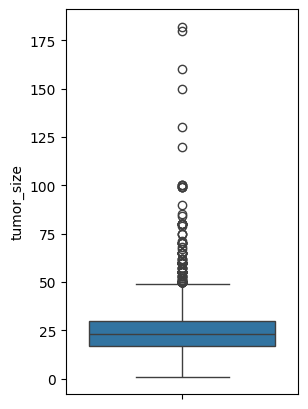

In [253]:
plt.figure(figsize=(3,5))

sns.boxplot(data=data, y='tumor_size')

plt.show()

As there are a lot of outliers I have decided to fill in the missing values for tumour size with the median.
For tumor stage there a lot of values missing, with what stage cancer you have beeing a huge factoir into survival rates I do not want to fill this with the mean or median distorting the results. Therefore akthough it is losing data the data is large enough to still have a good proportion of information so have deciding to drop the column.

In [254]:
data['tumor_size'] = data['tumor_size'].fillna(data['tumor_size'].median())

In [256]:
data = data.dropna()

In [258]:
data.reset_index()

index  age_at_diagnosis type_of_breast_surgery  \
0         0             75.65             MASTECTOMY   
1         1             43.19      BREAST CONSERVING   
2         2             48.87             MASTECTOMY   
3         3             47.68             MASTECTOMY   
4         4             76.97             MASTECTOMY   
...     ...               ...                    ...   
1398   1619             70.65      BREAST CONSERVING   
1399   1621             75.62             MASTECTOMY   
1400   1623             52.84      BREAST CONSERVING   
1401   1628             48.59             MASTECTOMY   
1402   1664             63.20      BREAST CONSERVING   

                           cancer_type_detailed cellularity  chemotherapy  \
0              Breast Invasive Ductal Carcinoma        High             0   
1              Breast Invasive Ductal Carcinoma        High             0   
2              Breast Invasive Ductal Carcinoma        High             1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
...                                         ...         ...           ...   
1398  Breast Mixed Ductal and Lobular Carcinoma        High             0   
1399           Breast Invasive Ductal Carcinoma        High             0   
1400  Breast Mixed Ductal and Lobular Carcinoma        High             1   
1401           Breast Invasive Ductal Carcinoma        High             1   
1402   Breast Invasive Mixed Mucinous Carcinoma        High             0   

     primary_tumor_laterality  lymph_nodes_examined_positive  \
0                       Right                           10.0   
1                       Right                            0.0   
2                       Right                            1.0   
3                       Right                            3.0   
4                       Right                            8.0   
...                       ...                            ...   
1398                     Left                            0.0   
1399                    Right                            0.0   
1400                    Right                            6.0   
1401                    Right                            1.0   
1402                    Right                            0.0   

      overall_survival_months  overall_survival  tumor_size  tumor_stage  
0                  140.500000                 1        22.0          2.0  
1                   84.633333                 1        10.0          1.0  
2                  163.700000                 0        15.0          2.0  
3                  164.933333                 1        25.0          2.0  
4                   41.366667                 0        40.0          2.0  
...                       ...               ...         ...          ...  
1398               201.166667                 1        20.0          1.0  
1399               105.200000                 0        20.0          1.0  
1400               200.333333                 1        20.0          2.0  
1401                14.700000                 0        30.0          2.0  
1402               281.500000                 1        22.0          2.0  

[1403 rows x 12 columns]

In [ ]:
tumor_size

In [ ]:
# Reflection on results 

# Section 4: Data Visualization (16 marks)  

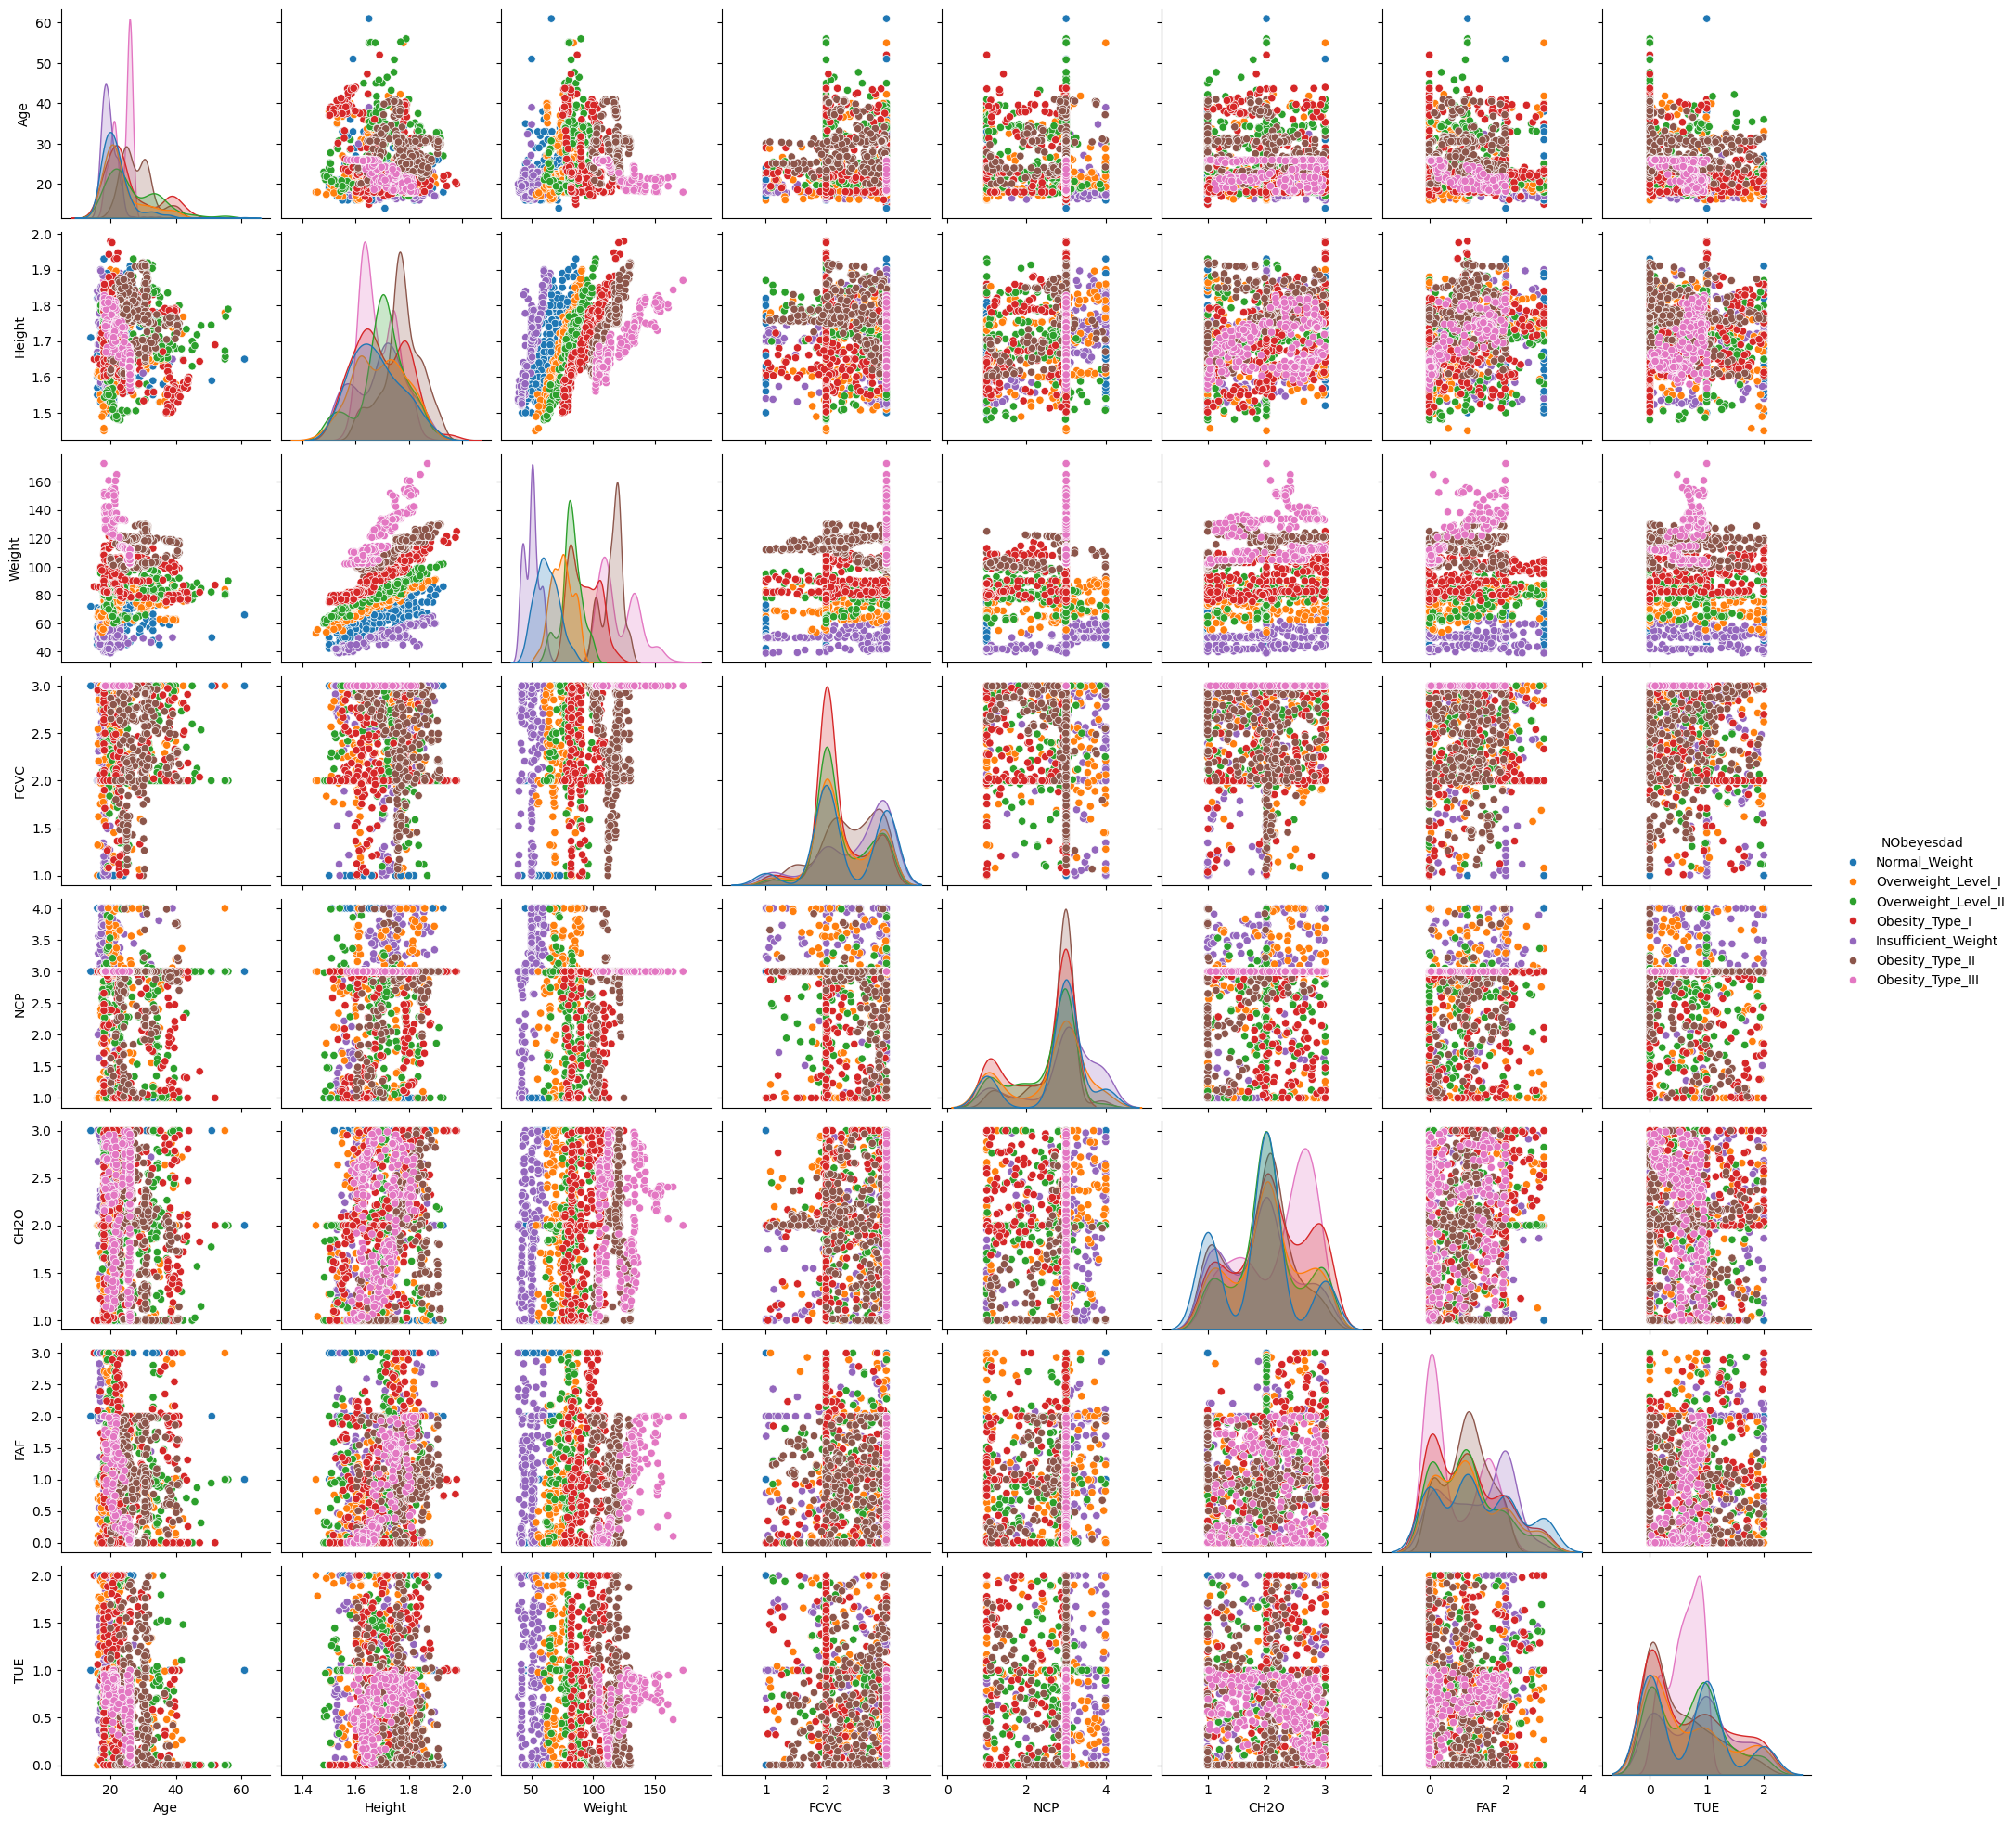

In [136]:
# Explanation and Documentation 
sns.pairplot(data, hue='NObeyesdad')

<Axes: xlabel='MTRANS', ylabel='Weight'>

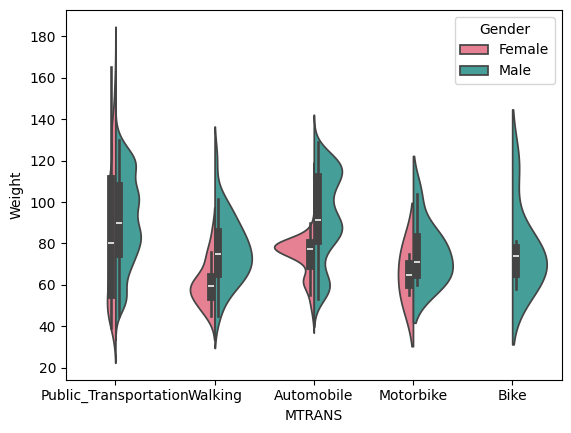

In [146]:
sns.violinplot(x='MTRANS', y='Weight', data=data, hue='Gender', split=True, palette='husl')

<Axes: xlabel='MTRANS', ylabel='Weight'>

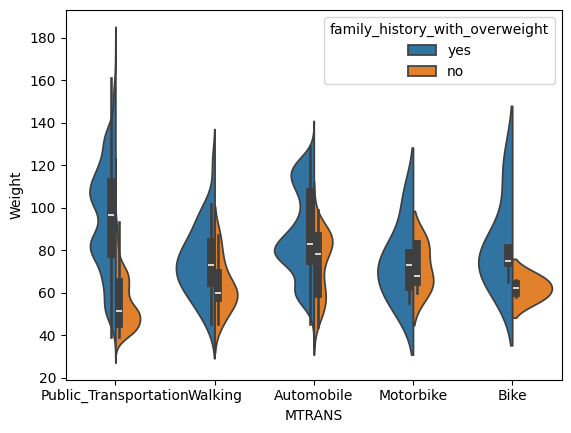

In [147]:
sns.violinplot(x='MTRANS', y='Weight', data=data, hue='family_history_with_overweight', split=True)

<Axes: xlabel='family_history_with_overweight', ylabel='Weight'>

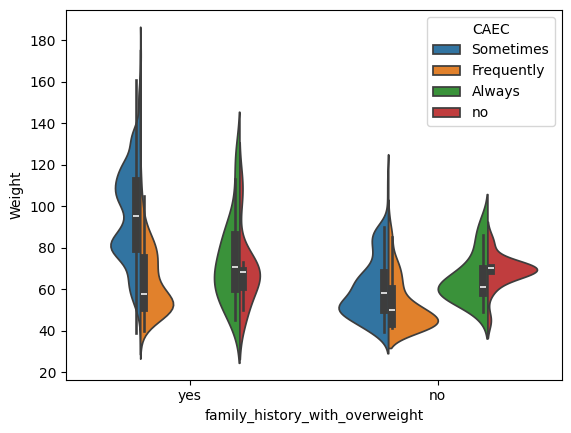

In [152]:
sns.violinplot(x='family_history_with_overweight', y='Weight', data=data, hue='CAEC', split=True)

<Axes: xlabel='MTRANS', ylabel='Weight'>

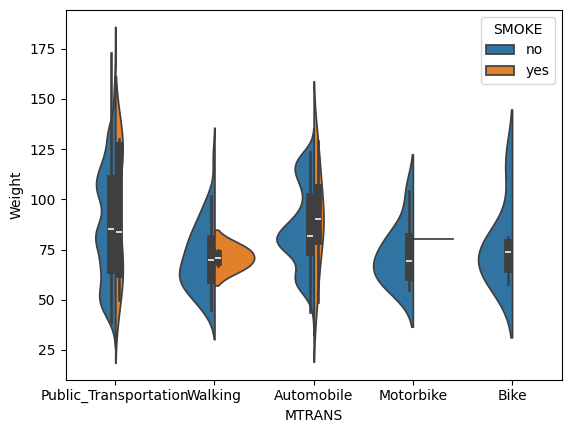

In [155]:
sns.violinplot(x='MTRANS', y='Weight', data=data, hue='SMOKE', split=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use st

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


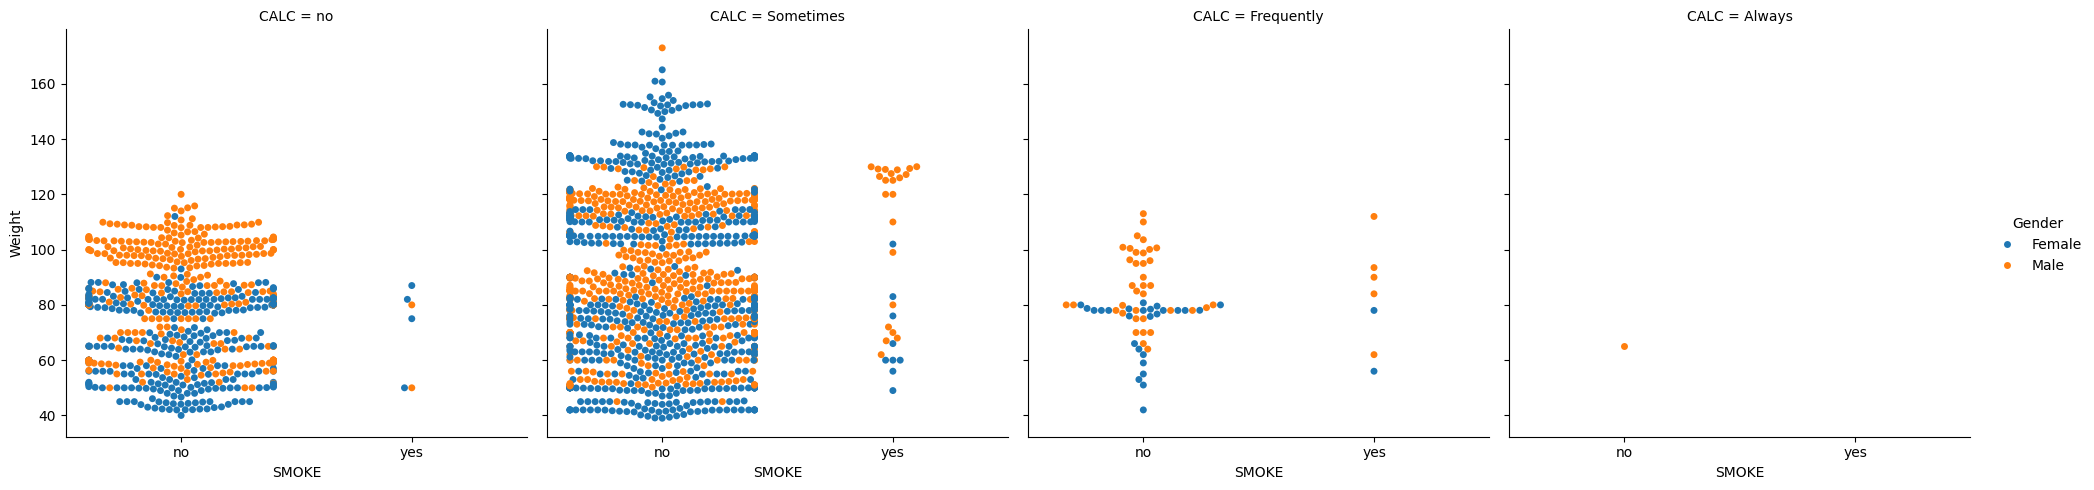

In [158]:
sns.catplot(data=data, kind='swarm', x='SMOKE', y='Weight',hue='Gender', col='CALC') 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 46.1% of the points cannot be placed; you may want to decrease the size of the markers or use s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


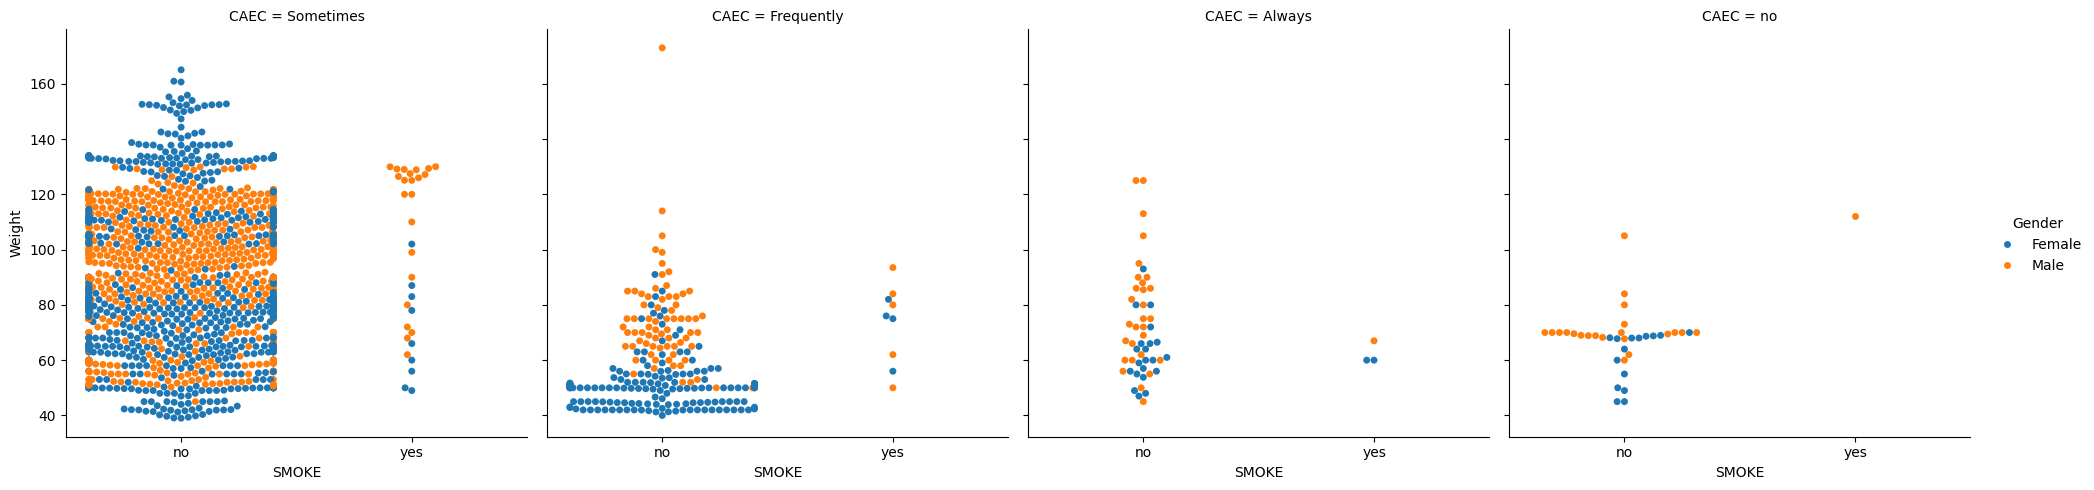

In [161]:
sns.catplot(data=data, kind='swarm', x='SMOKE', y='Weight',hue='Gender', col='CAEC') 

- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

In [153]:
data.head(10)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   
5    Male  29.0    1.62    53.0                             no  yes   2.0   
6  Female  23.0    1.50    55.0                            yes  yes   3.0   
7    Male  22.0    1.64    53.0                             no   no   2.0   
8    Male  24.0    1.78    64.0                            yes  yes   3.0   
9    Male  22.0    1.72    68.0                            yes  yes   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
5  3.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
6  3.0  Sometimes    no   2.0   no  1.0  0.0   Sometimes   
7  3.0  Sometimes    no   2.0   no  3.0  0.0   Sometimes   
8  3.0  Sometimes    no   2.0   no  1.0  1.0  Frequently   
9  3.0  Sometimes    no   2.0   no  1.0  1.0          no   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II  
5             Automobile        Normal_Weight  
6              Motorbike        Normal_Weight  
7  Public_Transportation        Normal_Weight  
8  Public_Transportation        Normal_Weight  
9  Public_Transportation        Normal_Weight

In [ ]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

In [ ]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)